In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

eval_dir = base_dir + '/Models/Evaluation_01'

This notebook plots the cosine error evaluation of the different parcellations

In [4]:
# Load evaluation results
D = pd.read_csv(eval_dir + '/eval_prederr_asym_K-12.tsv', sep='\t')
D

,Unnamed: 0,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,coserr_group,coserr_floor,coserr_ind2
0,0,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Ibc,half,1,0,0.908574,0.826654,0.884552
1,1,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Ibc,half,1,1,0.883184,0.803826,0.860780
2,2,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Ibc,half,1,2,0.925366,0.851839,0.932401
3,3,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Ibc,half,1,3,0.916689,0.848535,0.917149
4,4,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Ibc,half,1,4,0.943477,0.878295,0.941415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Nishimoto,half,2,1,0.839238,0.661449,0.892518
496,496,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Nishimoto,half,2,2,0.850360,0.654716,0.852317
497,497,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Nishimoto,half,2,3,0.836915,0.658120,0.833459
498,498,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Nishimoto,half,2,4,0.877629,0.715162,0.812946


<AxesSubplot:xlabel='test_data', ylabel='coserr_group'>

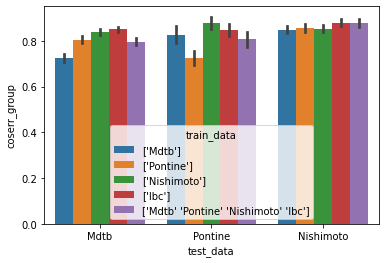

In [5]:
sb.barplot(data=D[D.test_data!='Ibc'],x='test_data',y='coserr_group',hue='train_data')

,count,mean,std,min,25%,50%,75%,max
train_data,,,,,,,,
['Mdtb' 'Pontine' 'Nishimoto'],96.0,0.068062,0.022415,0.036950,0.052314,0.060283,0.075061,0.134415
['Mdtb'],96.0,0.065320,0.021927,0.035921,0.050435,0.057539,0.072148,0.127865
['Nishimoto'],96.0,0.084702,0.026859,0.047537,0.064265,0.078370,0.100006,0.156431
['Pontine'],96.0,0.077210,0.024743,0.044232,0.059323,0.069797,0.088200,0.153313


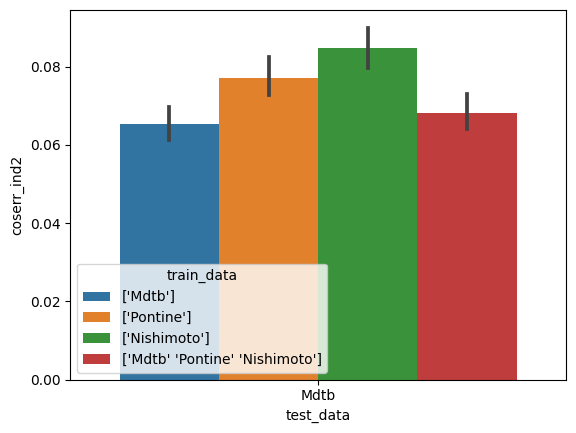

In [22]:

sb.barplot(data=coserror, x="test_data", y="coserr_ind2", hue="train_data")

coserror.groupby('train_data').coserr_ind2.describe()


<AxesSubplot:xlabel='model_name', ylabel='coserr_group'>

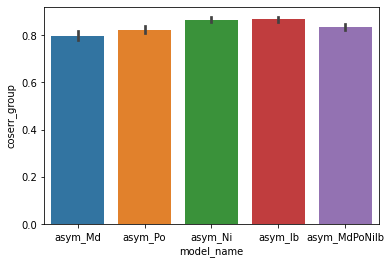

In [23]:

sb.barplot(data=D, x="model_name", y="coserr_group")
